In [1]:
# === Standard Library ===
import math
import random
import time
import heapq
import itertools
from collections import defaultdict, deque
from itertools import combinations
from typing import Any, Tuple, Dict, List, Set, Sequence, Union
# === Third-Party Libraries ===

# --- Scientific Computing ---
import numpy as np
import pandas as pd
import scipy.sparse as sp
from scipy.optimize import linprog

# --- Plotting ---
import matplotlib.pyplot as plt

# --- Parallel Processing ---
from joblib import Parallel, delayed
from tqdm import tqdm

# --- Graph Processing ---
import networkx as nx

# --- JIT Compilation ---
from numba import njit, prange

In [9]:
path1 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_ER_100_10_REGA.csv"
path2 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_BA_100_10_REGA.csv"
path3 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_SW_100_10_REGA.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [10]:
path4 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_BA_100_10_first_5.csv"
path5 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_ER_100_10_first_5.csv"
path6 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_SW_100_10_first_5.csv"

df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)

In [14]:
path7 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_ER_100_10_greedies_opt.csv"
path8 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_BA_100_10_greedies_opt.csv"
path9 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_SW_100_10_greedies_opt.csv"

df7 = pd.read_csv(path7)
df8 = pd.read_csv(path8)
df9 = pd.read_csv(path9)

In [12]:
sub_df1 = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=False)
sub_df1['epc_std'] = 0.0
sub_df1

,model,p,algo,time,epc,epc_std
0,ER,0.0,REGA,7.089809,0.00000,0.0
1,ER,0.1,REGA,17.369625,20.05155,0.0
2,ER,0.2,REGA,43.166783,53.58420,0.0
3,ER,0.3,REGA,135.994652,133.85070,0.0
4,ER,0.4,REGA,490.451155,307.83825,0.0
...,...,...,...,...,...,...
50,SW,1.0,Degree-based,0.001243,3918.65760,0.0
51,SW,1.0,Betweenness,0.028927,4005.00000,0.0
52,SW,1.0,PageRank,0.005488,3915.64800,0.0
53,SW,1.0,Greedy_ES,139.771202,3825.77710,0.0


In [15]:
sub_df2 = pd.concat([df7, df8, df9], ignore_index=False)
sub_df2 

,model,p,algo,time,epc,epc_std
0,ER,0.0,Greedy_ES_initial,2.667464,0.000000,0.000000
1,ER,0.0,Greedy_ES_final,4.447333,0.000000,0.000000
2,ER,0.0,Greedy_MIS_initial,3.612534,0.000000,0.000000
3,ER,0.0,Greedy_MIS_final,55.021285,0.000000,0.000000
4,ER,0.1,Greedy_ES_initial,0.511535,16.433100,0.000000
...,...,...,...,...,...,...
27,SW,0.6,Greedy_MIS_final,3902.432926,1691.393760,64.481810
28,SW,0.7,Greedy_ES_initial,19.153481,3042.441406,0.000000
29,SW,0.7,Greedy_ES_final,537.850837,2400.097500,0.000000
30,SW,0.7,Greedy_MIS_initial,19.859958,2950.429230,75.479263


In [17]:
final_df = pd.concat([sub_df1, sub_df2], ignore_index=False)
final_df.to_csv("Final_df_local_opt_REGA.csv", index=False)
final_df

,model,p,algo,time,epc,epc_std
0,ER,0.0,REGA,7.089809,0.000000,0.000000
1,ER,0.1,REGA,17.369625,20.051550,0.000000
2,ER,0.2,REGA,43.166783,53.584200,0.000000
3,ER,0.3,REGA,135.994652,133.850700,0.000000
4,ER,0.4,REGA,490.451155,307.838250,0.000000
...,...,...,...,...,...,...
27,SW,0.6,Greedy_MIS_final,3902.432926,1691.393760,64.481810
28,SW,0.7,Greedy_ES_initial,19.153481,3042.441406,0.000000
29,SW,0.7,Greedy_ES_final,537.850837,2400.097500,0.000000
30,SW,0.7,Greedy_MIS_initial,19.859958,2950.429230,75.479263


In [22]:
final_df.algo.unique()

array(['REGA', 'Degree-based', 'Betweenness', 'PageRank', 'Greedy_ES',
       'Greedy_MIS', 'Greedy_ES_initial', 'Greedy_ES_final',
       'Greedy_MIS_initial', 'Greedy_MIS_final'], dtype=object)

In [34]:
name_map = {
  'Greedy_MIS_final': 'Greedy_MIS_local',
  'Greedy_ES_final':  'Greedy_ES_local',
  'Greedy_MIS_initial': 'Greedy_MIS_naive',
  'Greedy_ES_initial':  'Greedy_ES_naive',
}

final_df['algo'] = final_df['algo'].replace(name_map)

final_df.to_csv("Final_df_local_opt_REGA.csv", index=False)
final_df.algo.unique()

array(['REGA', 'Degree-based', 'Betweenness', 'PageRank', 'Greedy_ES',
       'Greedy_MIS', 'Greedy_ES_naive', 'Greedy_ES_local',
       'Greedy_MIS_naive', 'Greedy_MIS_local'], dtype=object)

In [2]:
path = r"C:\Users\btugu\Documents\develop\research\SCNDP\src\extension\heuristics\results\csv\sparse\Result_heuristics_all_ls_.csv"
df = pd.read_csv(path)
df

,model,p,algo,time,epc,epc_std
0,ER,0.0,Degree-based,4.02724539999997,0.0,0.0
1,ER,0.0,Betweenness,0.09315040000001318,0.0,0.0
2,ER,0.0,PageRank,0.03593839999996362,0.0,0.0
3,ER,0.0,Greedy_ES_initial,0.05279250000000957,0.0,0.0
4,ER,0.0,Greedy_ES_final,1.0395157000000381,0.0,0.0
...,...,...,...,...,...,...
326,SW,1.0,Greedy_MIS_initial,3.893801830000302,3891.9912299999996,121.94057146935184
327,SW,1.0,Greedy_MIS_final,912.3433827000008,3283.195005,362.3931788230778
328,SW,1.0,REGA,91.68953229999897,2694.6279,0.0
329,SW,1.0,grasp,66.41671299999871,3828.5568,0.0


In [3]:
name_map = {
  'Greedy_MIS_final': 'Greedy_MIS_local',
  'Greedy_ES_final':  'Greedy_ES_local',
  'Greedy_MIS_initial': 'Greedy_MIS_naive',
  'Greedy_ES_initial':  'Greedy_ES_naive',
}

df['algo'] = df['algo'].replace(name_map)

df.to_csv("Results_all_heuristics_sparse.csv", index=False)
df.algo.unique()

array(['Degree-based', 'Betweenness', 'PageRank', 'Greedy_ES_naive',
       'Greedy_ES_local', 'Greedy_MIS_naive', 'Greedy_MIS_local', 'REGA',
       'grasp', 'grasp_path_relink', 'algo'], dtype=object)

In [8]:
final_df = pd.read_csv("Results_all_heuristics_sparse.csv")
final_df

,model,p,algo,time,epc,epc_std
0,ER,0.0,Degree-based,4.02724539999997,0.0,0.0
1,ER,0.0,Betweenness,0.09315040000001318,0.0,0.0
2,ER,0.0,PageRank,0.03593839999996362,0.0,0.0
3,ER,0.0,Greedy_ES_naive,0.05279250000000957,0.0,0.0
4,ER,0.0,Greedy_ES_local,1.0395157000000381,0.0,0.0
...,...,...,...,...,...,...
326,SW,1.0,Greedy_MIS_naive,3.893801830000302,3891.9912299999996,121.94057146935184
327,SW,1.0,Greedy_MIS_local,912.3433827000008,3283.195005,362.3931788230778
328,SW,1.0,REGA,91.68953229999897,2694.6279,0.0
329,SW,1.0,grasp,66.41671299999871,3828.5568,0.0


In [30]:
final_df = pd.read_csv(r"C:\Users\btugu\Documents\develop\research\SCNDP\src\extension\heuristics\results\csv\sparse\Result_heuristics_SW_100_10_all_ls_.csv")


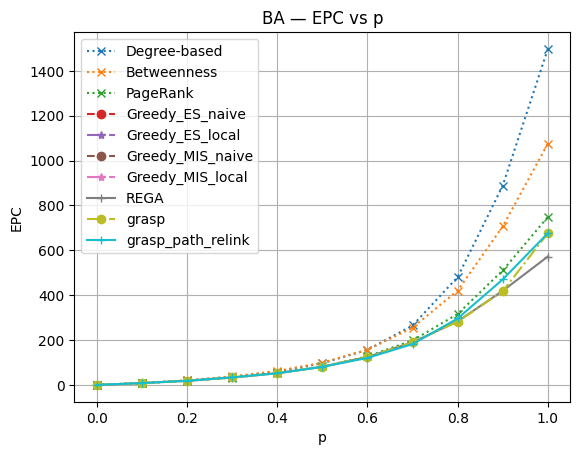

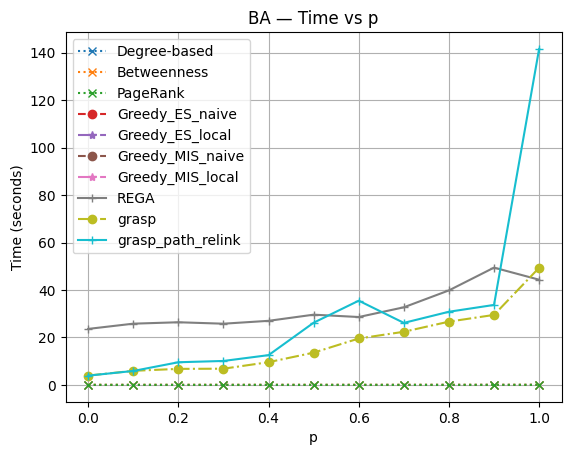

In [ ]:
ROOT_PATH = r"C:\Users\btugu\Documents\develop\research\SCNDP\src\extension\heuristics\results\plots"

sub_path = r"sparse"
suffix = "sparse"

import os

os.makedirs(os.path.join(ROOT_PATH, sub_path), exist_ok=True)

selected_algos = [
    'Degree-based', 
    'Betweenness', 
    'PageRank', 
    'Greedy_ES_naive',
    'Greedy_ES_local', 
    'Greedy_MIS_naive', 
    'Greedy_MIS_local', 
    'REGA',
    'grasp', 
    'grasp_path_relink'
    ]

marker_map = {
    'Degree-based':   "x",
    'Betweenness':  "x",
    'PageRank':     "x",
    'Greedy_ES_naive': "o",
    'Greedy_ES_local': "*", 
    'Greedy_MIS_naive': "o",
    'Greedy_MIS_local': "*",
    'REGA':         "+",
    'grasp':        "o",
    'grasp_path_relink': "+"
}

# marker_map = {
#     "Degree-based":    "x",
#     "REGA":          "o",
#     "Pagerank":      "*",
#     "Betweenness":   "+",
#     "Greedy_ES_local": "x",
#     "Greedy_MIS_local": "+",
# }

linestyle_map = {
    'Degree-based': ':',
    'Betweenness': ':',
    'PageRank': ':', 
    'Greedy_ES_naive': '--',
    'Greedy_ES_local': '-.',
    'Greedy_MIS_naive': '--',
    'Greedy_MIS_local': '-.',
    'REGA': '-',
    'grasp': '-.',
    'grasp_path_relink': '-'
}


for name in [
    # "ER",
    # "BA",
    "SW"
    ]:

    df_m = final_df[final_df.model==name]
    plt.figure()
    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.p, sub.epc,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — EPC vs p")
    plt.xlabel("p"); plt.ylabel("EPC")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_epc_vs_p_{suffix}.png")
    plt.show()

    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.p, sub.time,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — Time vs p")
    plt.xlabel("p"); plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_time_vs_p_{suffix}.png")
    plt.show()

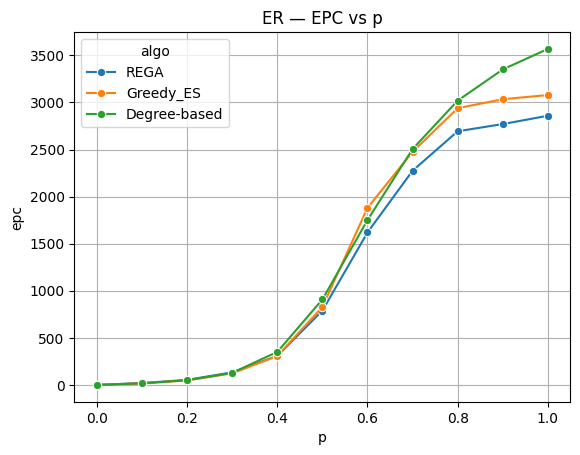

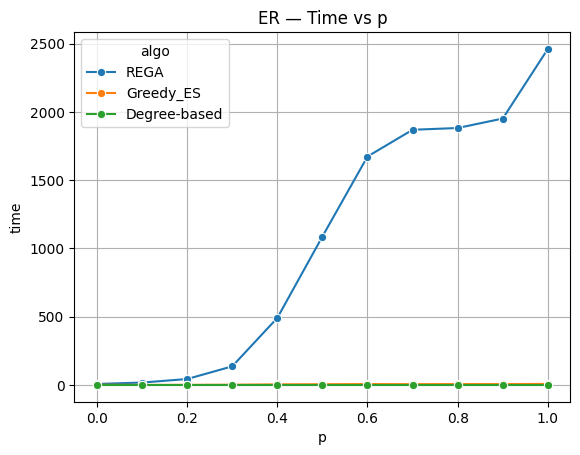

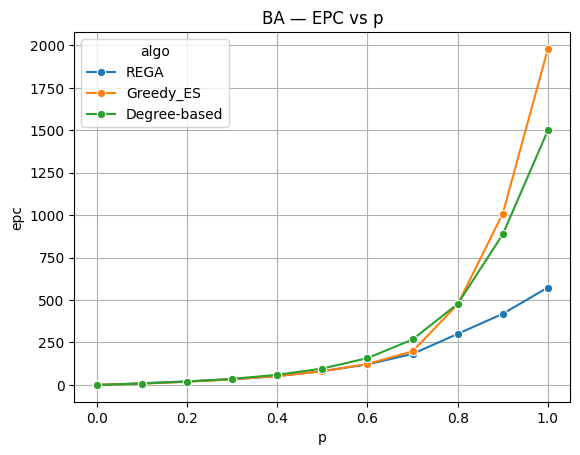

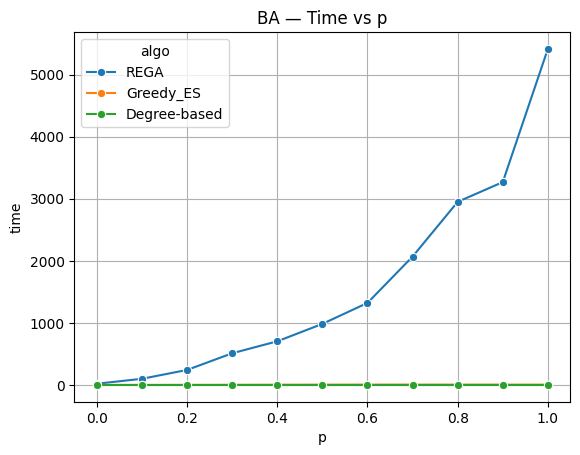

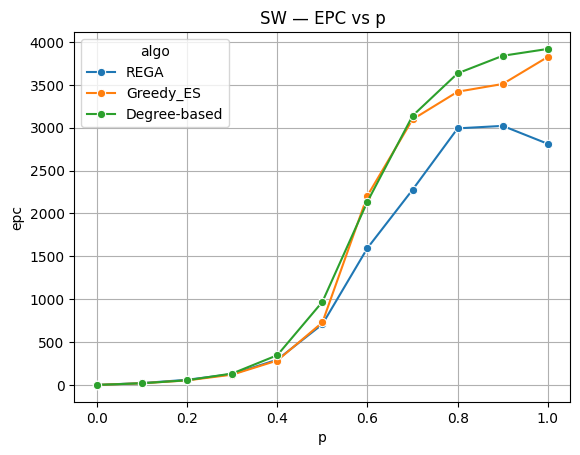

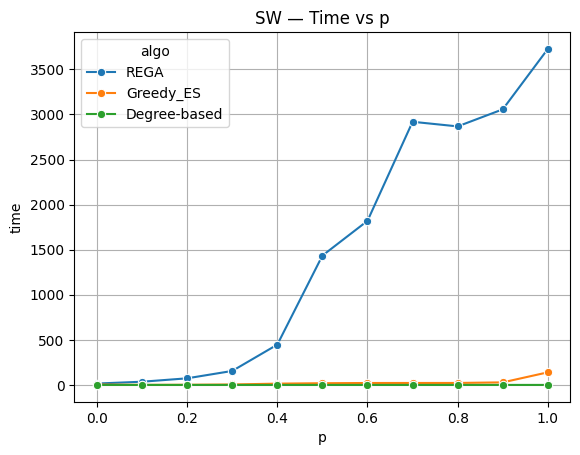

In [20]:
import seaborn as sns

ROOT_PATH = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\plots"
selected_algos = ["REGA", "Greedy_ES", "Degree-based"]
df_sel = final_df[final_df.algo.isin(selected_algos)]

for name in ["ER", "BA", "SW"]:
    df_m = df_sel[df_sel.model==name]

    # EPC
    plt.figure()
    sns.lineplot(
        data=df_m,
        x="p", y="epc",
        hue="algo", hue_order=selected_algos,
        marker="o"
    )
    plt.title(f"{name} — EPC vs p")
    plt.grid(True)
    plt.savefig(f"{ROOT_PATH}/{name}_epc_vs_p.png")

    # Time
    plt.figure()
    sns.lineplot(
        data=df_m,
        x="p", y="time",
        hue="algo", hue_order=selected_algos,
        marker="o"
    )
    plt.title(f"{name} — Time vs p")
    plt.grid(True)
    plt.savefig(f"{ROOT_PATH}/{name}_time_vs_p.png")

plt.show()
